In [2]:
import sys
import os

# Add the 'src' directory to the Python path
src_dir = os.path.join(os.path.dirname(os.getcwd()), 'src')
sys.path.append(src_dir)

In [3]:
import jax
import numpy as np
import jax.numpy as jnp

import numpy as np

from plotting import Plott_creator
from GD_class import *
from copy import deepcopy

import matplotlib.pyplot as plt

## Support functions

In [4]:
def make_design_matrix(x, degree):
    "Creates the design matrix for the given polynomial degree and ijnput data"
    
    X = np.zeros((len(x), degree+1))
    
    for i in range(X.shape[1]):
        X[:,i] = np.power(x, i)
        
    return jnp.array(X)

In [5]:
def cost_function_OLS(X, y, beta):
    n = len(y)  # Define the number of data points
    return (1.0/n) * jnp.sum((y - jnp.dot(X, beta))**2)


def analytical_gradient(X, y, beta):
    n = len(y)
    return (2.0/n)*jnp.dot(X.T, ((jnp.dot(X, beta))-y))

#### Generate Data

In [6]:
np.random.seed(1342)

true_beta = [2, 0.5, 3.2]

n = 1000

x = jnp.linspace(0, 1, n)
y = jnp.sum(jnp.asarray([x ** p * b for p, b in enumerate(true_beta)]),
                axis=0) + 0.1 * np.random.normal(size=len(x))



# Testing Gradient Descent methods

In [25]:
degree = 2
X = make_design_matrix(x, degree)

In [26]:
# Set parameters for gradient descent
learning_rate = 0.1
tol=1e-4
momentum=0.8
delta= 1e-8
rho1 = 0.9
rho2 = 0.99

max_iter = 10000

np.random.seed(505) # Set seed for reproducibility

In [27]:
# Normal gradient descent
grad_descent = GradientDescent(learning_rate=learning_rate, tol=tol, 
                               cost_function=cost_function_OLS,
                               analytic_gradient=analytical_gradient,
                               record_history=True)

betas_grad_descent = grad_descent.iterate(X=X, target=y, iteration_method="Full", max_iter=max_iter)
betas_grad_descent

Converged after 8715 iterations


Array([1.9987297, 0.5153122, 3.180923 ], dtype=float32)

In [28]:
# Gradient descent with momentum
grad_descent_momentum = GradientDescentMomentum(momentum=momentum,
                                                learning_rate=learning_rate, tol=tol, 
                                                cost_function=cost_function_OLS,
                                                analytic_gradient=analytical_gradient,
                                                record_history=True)

betas_momentum = grad_descent_momentum.iterate(X=X, target=y, iteration_method="Full", max_iter=max_iter)

Converged after 1761 iterations


In [29]:
# Gradient descent with adagrad
grad_descent_adagrad = GradientDescentAdagrad(delta=delta, momentum=momentum,
                                              learning_rate=learning_rate, tol=tol, 
                                              cost_function=cost_function_OLS,
                                              analytic_gradient=analytical_gradient,
                                              record_history=True)

betas_adagrad = grad_descent_adagrad.iterate(X=X, target=y, iteration_method="Full", max_iter=max_iter)

Converged after 9899 iterations


In [33]:
# Gradient descent with RMSProp
grad_descent_RMSprop = GradientDescentRMSprop(delta=delta, rho=0.7,
                                              learning_rate=learning_rate, tol=tol, 
                                              cost_function=cost_function_OLS,
                                              analytic_gradient=analytical_gradient,
                                              record_history=True)

betas_RMSprop = grad_descent_RMSprop.iterate(X=X, target=y, iteration_method="Full", max_iter=max_iter)

Did not converge in 10000 iterations


In [31]:
# Gradient descent with ADAM
grad_descent_ADAM = GradientDescentADAM(delta, rho1, rho2,
                                        learning_rate=learning_rate, tol=tol, 
                                        cost_function=cost_function_OLS,
                                        analytic_gradient=analytical_gradient,
                                        record_history=True)

betas_ADAM = grad_descent_ADAM.iterate(X=X, target=y, iteration_method="Full", max_iter=max_iter)

Converged after 629 iterations


## Plotting the cost scores for all the methods

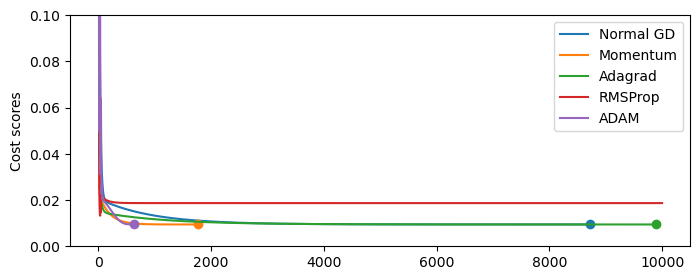

In [32]:
plt.figure(figsize=(8, 3))
plt.plot(range(len(grad_descent.cost_scores)), grad_descent.cost_scores, label="Normal GD", color="tab:blue")
plt.plot(len(grad_descent.cost_scores), grad_descent.cost_scores[-1], "o", color="tab:blue")
plt.plot(range(len(grad_descent_momentum.cost_scores)), grad_descent_momentum.cost_scores, 
         label="Momentum", color="tab:orange")
plt.plot(len(grad_descent_momentum.cost_scores), grad_descent_momentum.cost_scores[-1], "o", color="tab:orange")
plt.plot(range(len(grad_descent_adagrad.cost_scores)), grad_descent_adagrad.cost_scores, 
         label="Adagrad", color="tab:green")
plt.plot(len(grad_descent_adagrad.cost_scores), grad_descent_adagrad.cost_scores[-1], "o", color="tab:green")
plt.plot(range(len(grad_descent_RMSprop.cost_scores)), grad_descent_RMSprop.cost_scores, 
         label="RMSProp", color="tab:red")
plt.plot(range(len(grad_descent_ADAM.cost_scores)), grad_descent_ADAM.cost_scores, label="ADAM", color="tab:purple")
plt.plot(len(grad_descent_ADAM.cost_scores), grad_descent_ADAM.cost_scores[-1], "o", color="tab:purple")
plt.ylabel("Cost scores")
plt.ylim(0, 0.1)
plt.legend()
plt.savefig(r"Figures\Task_a\Gradient_descent_convergence.png")
plt.show()

## Plotting the fit for all methods

In [15]:
y_preds_grad_descent = X @ betas_grad_descent
y_preds_momentum = X @ betas_momentum
y_preds_adagrad = X @ betas_adagrad
y_preds_RMSprop = X @ betas_RMSprop
y_preds_ADAM = X @ betas_ADAM

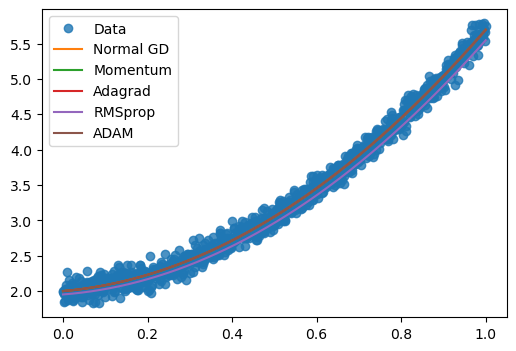

In [58]:
plt.figure(figsize=(5, 4))
plt.plot(x, y, ".", label="Data")
plt.plot(x, y_preds_grad_descent, label="Normal GD")
plt.plot(x, y_preds_momentum, label="Momentum")
plt.plot(x, y_preds_adagrad, label="Adagrad")
plt.plot(x, y_preds_RMSprop, label="RMSprop")
plt.plot(x, y_preds_ADAM, label="ADAM")
plt.legend()
plt.savefig(r"Figures\Task_a\Gradient_descent_fit_all_methods.png")
plt.show()

## Looking at the path for ADAM

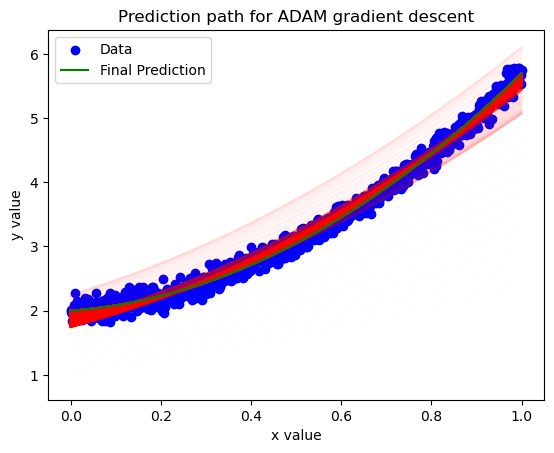

In [24]:
all_betas_ADAM = grad_descent_ADAM.betas
all_y_preds_ADAM = [X @ beta for beta in all_betas_ADAM]

plotter = Plott_creator()
plotter.plot_regression(x, y, all_y_preds_ADAM, 'Prediction path for ADAM gradient descent',
                        show_history=True, save_fig=True)

## Testing different iteration methods for ADAM

In [38]:
# Making a design matrix
degree = 1
X = make_design_matrix(x, degree)

In [39]:
np.random.seed(505) # Set seed for reproducibility

# Set parameters
learning_rate = 0.1
tol=1e-3
momentum=0.5
delta= 1e-8
rho1 = 0.9
rho2 = 0.99

grad_descentADAM = GradientDescentADAM(delta, rho1, rho2,
                                       learning_rate=learning_rate, tol=tol, 
                                       cost_function=cost_function_OLS,
                                       analytic_gradient=analytical_gradient,
                                       record_history=True)
grad_descentADAM_stoc = GradientDescentADAM(delta, rho1, rho2,
                                            learning_rate=learning_rate, tol=tol, 
                                            cost_function=cost_function_OLS,
                                            analytic_gradient=analytical_gradient,
                                            skip_convergence_check=True,
                                            record_history=True)

grad_descentADAM_stoc_with_lr_decay = deepcopy(grad_descentADAM_stoc)

max_iter = 100000
max_epochs = 10
grad_descentADAM.iterate(X=X, target=y, iteration_method="Full", 
                         max_iter=max_iter)
grad_descentADAM_stoc.iterate(X=X, target=y, iteration_method="Stochastic", 
                              max_epoch=max_epochs,
                              num_batches=100)
grad_descentADAM_stoc_with_lr_decay.iterate(X=X, target=y, iteration_method="Stochastic", 
                                            max_epoch=max_epochs,
                                            num_batches=100,
                                            schedule_method="Linear decay")

Converged after 193 iterations


Array([1.4683223, 3.7065134], dtype=float32)

## Plotting the gradient descent

In [40]:
plotter = Plott_creator()

In [42]:
betas = grad_descentADAM.betas
y_preds = [X @ beta for beta in betas]

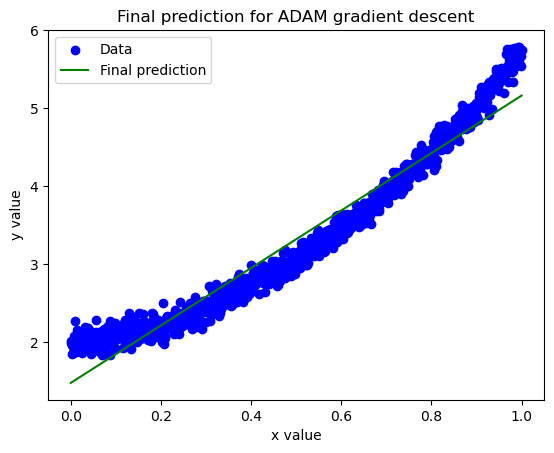

In [43]:
plotter.plot_regression(x, y, y_preds, 'Final prediction for ADAM gradient descent', save_fig=True)

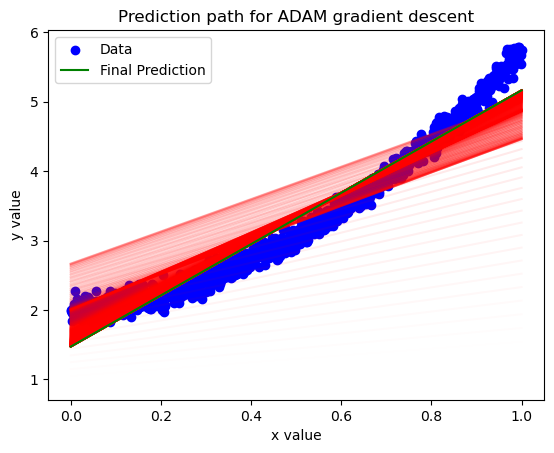

In [44]:
plotter.plot_regression(x, y, y_preds, 'Prediction path for ADAM gradient descent',
                        show_history=True)

## Plotting the cost function history

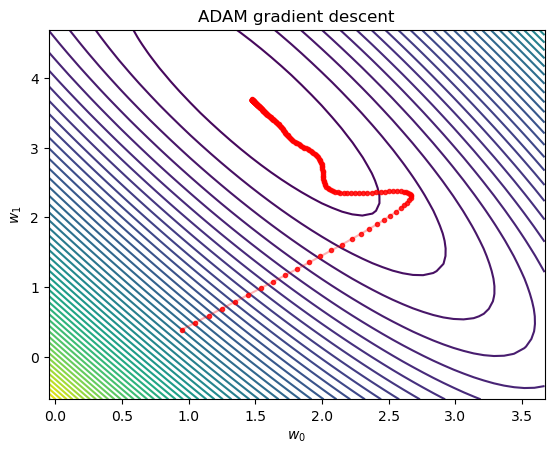

In [55]:
plotter.plot_path_weights(cost_function_OLS, X, y, grad_descentADAM.betas,  
                          'ADAM gradient descent', save_fig=True)

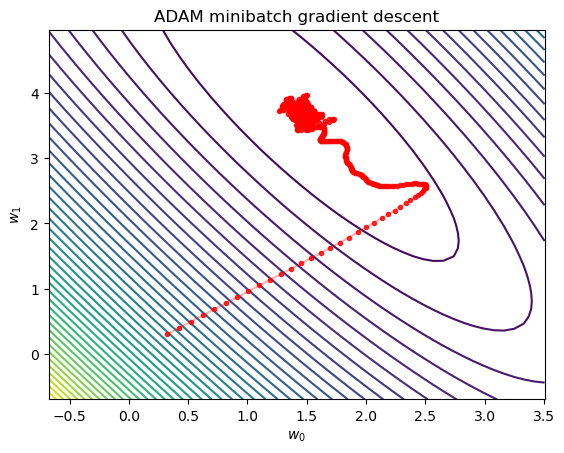

In [56]:
plotter.plot_path_weights(cost_function_OLS, X, y, grad_descentADAM_stoc.betas,  
                          'ADAM minibatch gradient descent', save_fig=True)

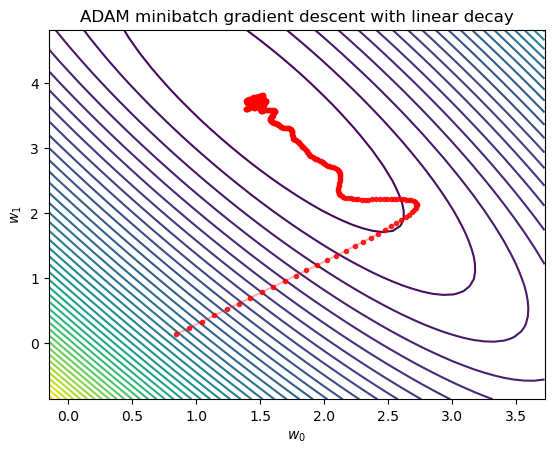

In [57]:
plotter.plot_path_weights(cost_function_OLS, X, y, grad_descentADAM_stoc_with_lr_decay.betas,  
                          'ADAM minibatch gradient descent with linear decay',
                          save_fig=True)